Import all the necessary libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import datetime

In [2]:
#Read the Data in 'train.parquet'
df = pd.read_parquet('train.parquet',engine='pyarrow')
df

,Patient-Uid,Date,Incident
0,a0db1e73-1c7c-11ec-ae39-16262ee38c7f,2019-03-09,PRIMARY_DIAGNOSIS
1,a0dc93f2-1c7c-11ec-9cd2-16262ee38c7f,2015-05-16,PRIMARY_DIAGNOSIS
3,a0dc94c6-1c7c-11ec-a3a0-16262ee38c7f,2018-01-30,SYMPTOM_TYPE_0
4,a0dc950b-1c7c-11ec-b6ec-16262ee38c7f,2015-04-22,DRUG_TYPE_0
8,a0dc9543-1c7c-11ec-bb63-16262ee38c7f,2016-06-18,DRUG_TYPE_1
...,...,...,...
29080886,a0ee9f75-1c7c-11ec-94c7-16262ee38c7f,2018-07-06,DRUG_TYPE_6
29080897,a0ee1284-1c7c-11ec-a3d5-16262ee38c7f,2017-12-29,DRUG_TYPE_6
29080900,a0ee9b26-1c7c-11ec-8a40-16262ee38c7f,2018-10-18,DRUG_TYPE_10
29080903,a0ee1a92-1c7c-11ec-8341-16262ee38c7f,2015-09-18,DRUG_TYPE_6


In [3]:
#Since we are concerned only with the drop-off rate of 'TARGET DRUG', we shall only consider such entries.
df = df[df['Incident']=='TARGET DRUG']
df['Date'] = pd.to_datetime(df['Date']) #Convert string to panda datetime.
df = df.sort_values(['Patient-Uid','Date']) #Sort data
df = df.reset_index(drop=True)
df

C:\Users\Krishna Chaitanya N\AppData\Local\Temp\ipykernel_22744\2747645159.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date']) #Convert string to panda datetime.


,Patient-Uid,Date,Incident
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-07-08,TARGET DRUG
1,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-08-05,TARGET DRUG
2,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09-02,TARGET DRUG
3,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-04-24,TARGET DRUG
4,a0e9c3b3-1c7c-11ec-ae8e-16262ee38c7f,2018-05-17,TARGET DRUG
...,...,...,...
67213,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08-11,TARGET DRUG
67214,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07-21,TARGET DRUG
67215,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-06-18,TARGET DRUG
67216,a0f0d582-1c7c-11ec-a6c1-16262ee38c7f,2020-07-09,TARGET DRUG


In [4]:
#All unique patient-uids are collected below:
patients = df['Patient-Uid'].unique()
len(patients)

9374

In [5]:
dropped = [] #An array to keep track of the dropped off patients and the corresponding month.
for pat in patients:
    data = df[df['Patient-Uid']==pat]
    dates = data['Date'].values
    month = data['Date'].dt.to_period('M') #Keeping track of the months
    date_r = pd.to_timedelta(dates[-1]-dates[0]) #Diff in time the last and first usage of 'TARGET DRUG'
    if date_r<=datetime.timedelta(days=365): #Since ideal treatment duration is 1 year.
        dropped.append((pat,str(month.values[-1]))) #Track of patient and last usage month

In [6]:
dropped = np.array(dropped)
dropped[:10]

array([['a0e9c384-1c7c-11ec-81a0-16262ee38c7f', '2020-09'],
       ['a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f', '2020-05'],
       ['a0e9c443-1c7c-11ec-9eb0-16262ee38c7f', '2020-07'],
       ['a0e9c4a3-1c7c-11ec-aa86-16262ee38c7f', '2020-05'],
       ['a0e9c502-1c7c-11ec-89d3-16262ee38c7f', '2020-08'],
       ['a0e9c531-1c7c-11ec-8c5e-16262ee38c7f', '2020-06'],
       ['a0e9c561-1c7c-11ec-ac1a-16262ee38c7f', '2019-05'],
       ['a0e9c61f-1c7c-11ec-a87d-16262ee38c7f', '2019-11'],
       ['a0e9c64e-1c7c-11ec-b73b-16262ee38c7f', '2018-09'],
       ['a0e9c751-1c7c-11ec-b708-16262ee38c7f', '2020-01']], dtype='<U36')

In [7]:
dropped = np.transpose(dropped)
df_drop = pd.DataFrame({'Patient-Uid':dropped[0],'Month':dropped[1]})
df_drop

,Patient-Uid,Month
0,a0e9c384-1c7c-11ec-81a0-16262ee38c7f,2020-09
1,a0e9c3e3-1c7c-11ec-a8b9-16262ee38c7f,2020-05
2,a0e9c443-1c7c-11ec-9eb0-16262ee38c7f,2020-07
3,a0e9c4a3-1c7c-11ec-aa86-16262ee38c7f,2020-05
4,a0e9c502-1c7c-11ec-89d3-16262ee38c7f,2020-08
...,...,...
5792,a0f0d4c5-1c7c-11ec-bfec-16262ee38c7f,2020-08
5793,a0f0d4f4-1c7c-11ec-b144-16262ee38c7f,2020-07
5794,a0f0d523-1c7c-11ec-89d2-16262ee38c7f,2020-08
5795,a0f0d553-1c7c-11ec-a70a-16262ee38c7f,2020-07


So, df_drop contains all the patients who have stopped the usage of 'TARGET DRUG' before its ideal duration of 1 year. We see that out of **9374** patients who have used this drug at least once, **5797** patients dropped out before course.

We can now evaluate the number of patients dropped per month as shown below:

In [8]:
drop = df_drop.groupby('Month')['Patient-Uid'].nunique()
drop[:10]

Month
2018-03     48
2018-04     65
2018-05     65
2018-06     86
2018-07    104
2018-08    120
2018-09    115
2018-10    118
2018-11    126
2018-12    128
Name: Patient-Uid, dtype: int64

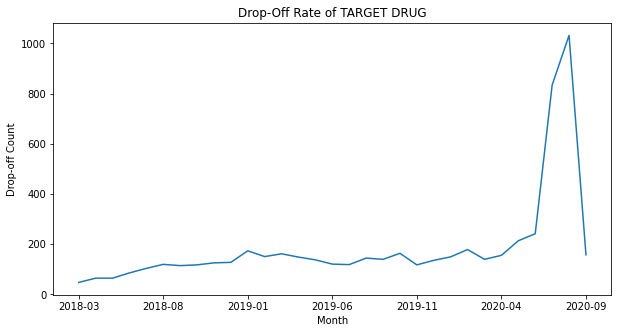

In [9]:
plt.figure(figsize=(10,5))
drop.plot(kind='line')
plt.xlabel('Month')
plt.ylabel('Drop-off Count')
plt.title('Drop-Off Rate of TARGET DRUG')
plt.show()

We see that there is a huge spike in the amount of patients who stopped using the drug in the months between the April and September of 2020. I can guess that this was the time when **COVID-19** first started to grip the world and maybe 'TARGET DRUG' was not efficient enough for its treatment. However, it seemed to fall again drastically close to September which seems to be the mark of the end of the First Wave.